In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

df= pd.read_csv("population.csv")
#We are supposing the data of population is in Millions (eg. 30 is 30,000,000) 
# replacing  null value to zero in population column 

country_population = df.fillna(0) 

In [2]:
# 1.	How many countries had no recorded population data (0) for the year 2000? List these countries along with their regions.
country_population_2000 = country_population[(country_population["year"] == 2000) & (country_population["population"] == 0.0)]
country_population_2000_list = country_population_2000[["country name", "continent"]].sort_values(by="continent")
country_population_2000_list.to_csv("CountryPopulation.csv",index=False) # to paste the output in proper formate I have to_csv so that 
print(country_population_2000_list.to_string(index=False))

# We have 60 countries had no recorded population data (0) for the year 2000 and list is metioned in word document.

                     country name     continent
                Equatorial Guinea        Africa
                       Cape Verde        Africa
                          Comoros        Africa
                         Djibouti        Africa
                          Reunion        Africa
            Sao Tome and Principe        Africa
                       Seychelles        Africa
                     Saint Helena        Africa
                   Western Sahara        Africa
                           Bhutan          Asia
                           Brunei          Asia
                           Cyprus          Asia
                            Macau          Asia
                         Maldives          Asia
         Timor-Leste (East Timor)          Asia
                            Qatar          Asia
                          Bahrain          Asia
                    Faroe Islands        Europe
                        Gibraltar        Europe
                            Malta       

991.0


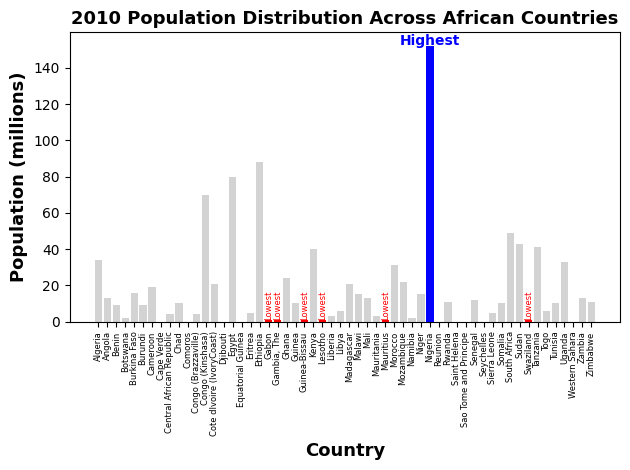

In [2]:

# 2.Calculate the total population for all African countries in 2010. Create a bar chart showing the population distribution
#  across African countries in 2010.
Africancountries_2010 =country_population[(country_population["year"] == 2010) & (country_population["continent"] == "Africa")]
total_population = Africancountries_2010["population"].sum()
print(total_population)

max_pop = Africancountries_2010["population"].max()

non_zero_pop = Africancountries_2010[Africancountries_2010["population"] > 0]
# Find the minimum population (excluding 0s)
min_pop = non_zero_pop["population"].min()
max_countries = Africancountries_2010.loc[Africancountries_2010["population"] == max_pop, "country name"].tolist()
min_countries = Africancountries_2010.loc[(Africancountries_2010["population"] == min_pop), "country name"].tolist()

#  Assign colors — highlight max and min
colors = [
    "blue" if c in max_countries else
    "red" if c in min_countries else
    "#D3D3D3"
    for c in Africancountries_2010["country name"]
]
plt.clf()
plt.bar(
    Africancountries_2010["country name"],
    Africancountries_2010["population"],
    color=colors
)
plt.xticks(rotation=90, fontsize=6)
plt.title("2010 Population Distribution Across African Countries",  fontweight="bold", fontsize=13)
plt.xlabel("Country", fontweight="bold", fontsize=13 )
plt.ylabel("Population (millions)", fontweight="bold", fontsize=13) 

for c in max_countries:
    pop = Africancountries_2010.loc[Africancountries_2010["country name"] == c, "population"].values[0]
    plt.text(c, pop + 0.5, "Highest", ha="center", color="blue", fontweight="bold")

for c in min_countries:
    pop = Africancountries_2010.loc[Africancountries_2010["country name"] == c, "population"].values[0]
    plt.text(c, pop + 0.1, "Lowest", fontsize=6,ha="center", color="red",  rotation=90,  va="bottom")

plt.tight_layout()
plt.savefig("Answer_2.png", format="png") #saving in as image in same repository 

# Total population is 991,000,000 and graph is posted in word file.

Average Population :34.3

Countries ABOVE average population:['Argentina', 'Brazil', 'Colombia']

Countries BELOW average population:['Bolivia', 'Chile', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']


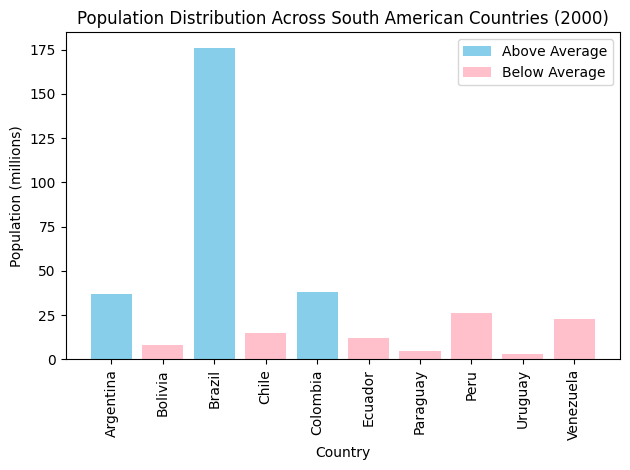

In [3]:
# 3.	Determine the average population of countries in South America for the year 2000. 
# Highlight countries with populations above and below this average. Include the lists in your analysis.

SA_2000 =country_population[(country_population["year"] == 2000) & (country_population["continent"] == "South America") &
    (country_population["population"] > 0) ]
avg_population = SA_2000["population"].mean()
print("Average Population :" +str(avg_population))

above_avg = SA_2000.loc[
    SA_2000["population"] > avg_population, "country name"
].tolist()

below_avg = SA_2000.loc[
    SA_2000["population"] < avg_population, "country name"
].tolist()

print("\nCountries ABOVE average population:" +str(above_avg))

print("\nCountries BELOW average population:"+ str(below_avg))

colors = [
    "skyblue" if c in above_avg else
    "pink" if c in below_avg else
    "gray"
    for c in  SA_2000["country name"]
]
plt.bar(
    SA_2000["country name"],
    SA_2000["population"],
    color=colors
)

plt.xticks(rotation=90)
plt.title("Population Distribution Across South American Countries (2000)")
plt.xlabel("Country")
plt.ylabel("Population (millions)")
legend_elements = [Patch(facecolor='skyblue', label='Above Average'),
                   Patch(facecolor='pink', label='Below Average')]
plt.legend(handles=legend_elements)

plt.tight_layout()

plt.savefig("Answer_3.png", format="png") #saving in as image in same repository 

Countries above 1000 million population is ['China', 'India']


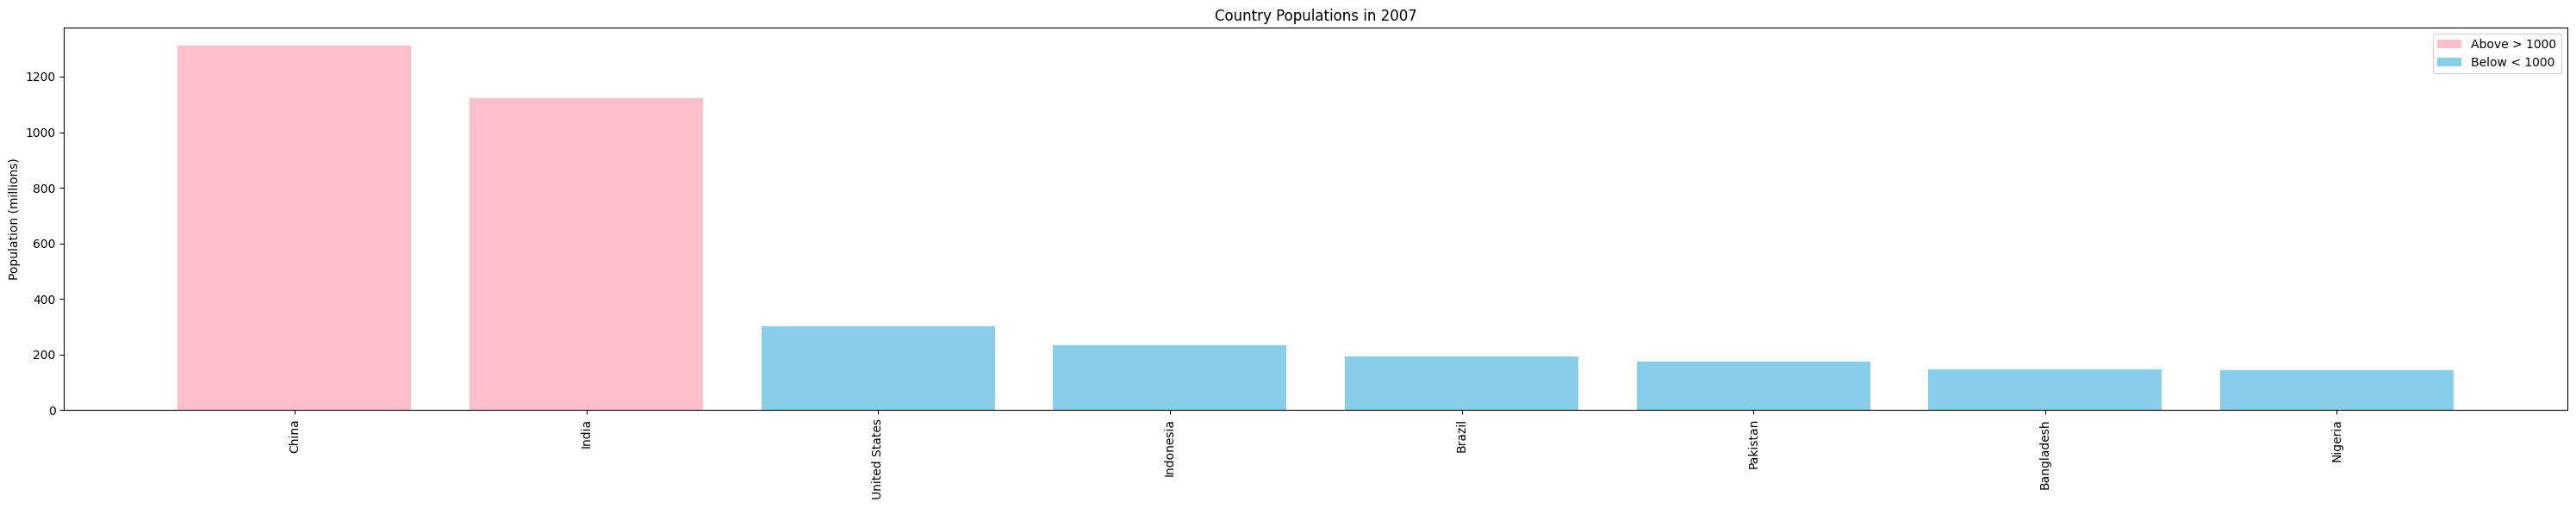

In [5]:

# 4.	Identify the countries with populations exceeding 1000 million in 2007. Create a bar chart or scatter
#  plot to display all countries' populations in 2007, marking those above 1000.

population_2007 =country_population[country_population["year"] == 2007]
above_1000 = population_2007[population_2007["population"] > 1000]["country name"].tolist()
print("Countries above 1000 million population is " +str(above_1000))
plt.figure(figsize=(30,6)) 

top_5_max = population_2007.nlargest(8, 'population')
top_5_min = population_2007[population_2007['population'] >= 200].nsmallest(8, 'population')

population_2007= pd.concat([top_5_max, top_5_min]).reset_index(drop=True)
colors = ['pink' if x > 1000 else 'skyblue' for x in population_2007["population"]]
plt.bar(population_2007["country name"], population_2007["population"], color= colors)

plt.xticks(rotation=90)
plt.ylabel("Population (millions)")
plt.title("Country Populations in 2007")

legend_elements = [Patch(facecolor='pink', label='Above > 1000'),
                   Patch(facecolor='skyblue', label='Below < 1000')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig("Answer_4.png", format="png") #saving in as image in same repository 

Total population growth in Europe 2000 to 2010 reduced to 8.0
Top 5 European countries are          Spain
        France
United Kingdom
   Netherlands
        Sweden


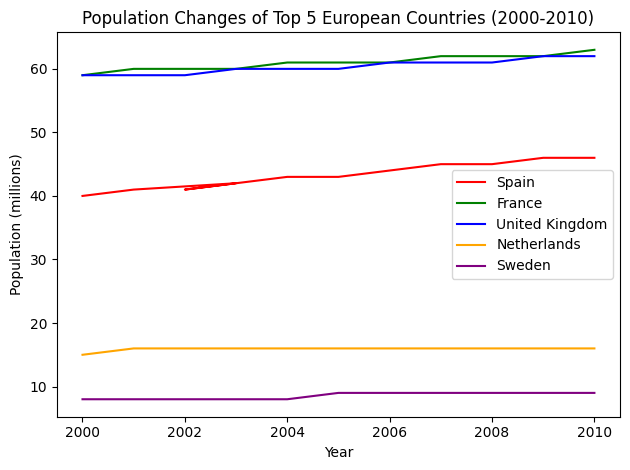

In [9]:

# 5.Calculate the total population growth in Europe between 2000 and 2010. Identify the top 5 European countries 
# by population growth during this period, and create a line plot showing the population changes of these countries from 2000 to 2010.

Europe_2000 = country_population[(country_population["continent"] == "Europe") & (country_population["year"] == 2000)]
Europe_2010 = country_population[(country_population["continent"] == "Europe") & (country_population["year"] == 2010)]

# Calculate total population growth in Europe between 2000 and 2010
Total_2000 = Europe_2000["population"].sum()
Total_2010 = Europe_2010["population"].sum()
Growth = Total_2010 - Total_2000
print("Total population growth in Europe 2000 to 2010 reduced to " +str(abs(Growth)))


Europe_2000 = Europe_2000[["country name", "population"]].rename(columns={"population": "population_2000"})
Europe_2010 = Europe_2010[["country name", "population"]].rename(columns={"population": "population_2010"})

Europe_2010_2000 = pd.merge(Europe_2000,Europe_2010, on = "country name")



Europe_2010_2000["growth"] = Europe_2010_2000["population_2010"] - Europe_2010_2000["population_2000"]
Europe_2010_2000 = Europe_2010_2000.sort_values("growth", ascending= False).head(5)
Top5 = Europe_2010_2000["country name"].to_string(index=False)
print("Top 5 European countries are " + str(Top5))

Europe_country = country_population[country_population["country name"].isin(Europe_2010_2000["country name"])]

colors = ["red", "green", "blue", "orange", "purple"] 

for  country, c in zip(Europe_2010_2000["country name"], colors):
    small_df = Europe_country[Europe_country["country name"] == country]
    plt.plot(small_df["year"],small_df["population"],label=country, color=c)
  


plt.title("Population Changes of Top 5 European Countries (2000-2010)")
plt.xlabel("Year")
plt.legend()
plt.ylabel("Population (millions)")
plt.tight_layout()
plt.savefig("Answer_5.png", format="png") #saving in as image in same repository 


# Total population growth in Europe 2000 to 2010 reduced to 8.0
# Top 5 European countries are          Spain
#         France
# United Kingdom
#    Netherlands
#         Sweden